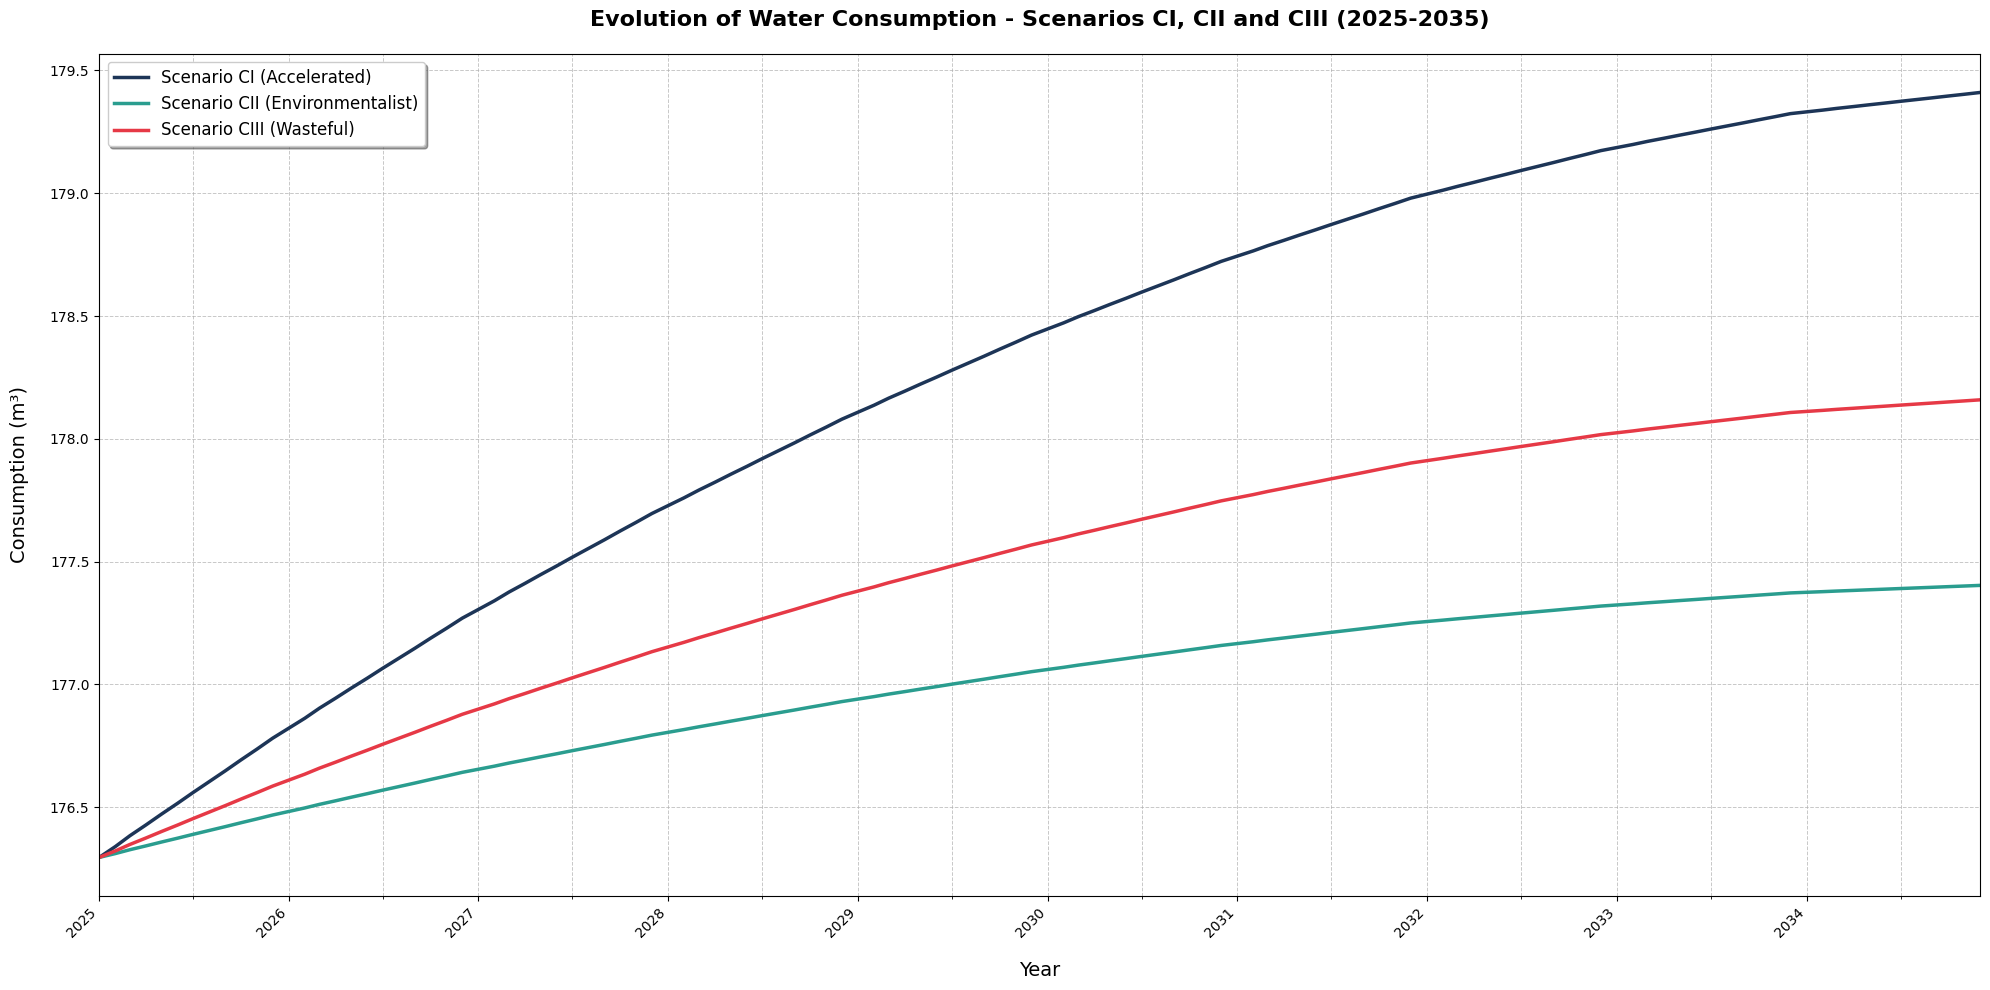

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import matplotlib.dates as mdates
import os

path = 'C:\\Users\\Edmilson\\Gama_Workspace2\\ABMS-WP'

# Complete data (2025-2034) - ensuring the same length
months = []
ci_data = []
cii_data = []
ciii_data = []

# Load data from CSV
file_path = os.path.join(path, 'resultados\dados_simulacao.csv')
df = pd.read_csv(file_path)

# Rename columns for consistency
df.columns = ['Month/Year', 'Scenario CI', 'Scenario CII', 'Scenario CIII']

# Convert Month/Year to datetime
df['Date'] = pd.to_datetime(df['Month/Year'], format='%m/%Y')
ci_data = df['Scenario CI']
cii_data = df['Scenario CII']
ciii_data = df['Scenario CIII']
months = df['Date']

data = {
    'Month/Year': months,
    'Scenario CI': ci_data,
    'Scenario CII': cii_data,
    'Scenario CIII': ciii_data
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Month/Year to datetime
df['Date'] = pd.to_datetime(df['Month/Year'], format='%m/%Y')

# Configure the plot
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Scenario CI'], label='Scenario CI (Accelerated)', color='#1D3557', linewidth=2.5)
plt.plot(df['Date'], df['Scenario CII'], label='Scenario CII (Environmentalist)', color='#2A9D8F', linewidth=2.5)
plt.plot(df['Date'], df['Scenario CIII'], label='Scenario CIII (Wasteful)', color='#E63946', linewidth=2.5)

# X-axis settings
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Major ticks for each year
ax.xaxis.set_minor_locator(MonthLocator(bymonth=[7]))  # Minor ticks for July of each year
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format showing only the year

# Add plot elements
plt.title('Evolution of Water Consumption - Scenarios CI, CII and CIII (2025-2035)', 
         fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=14, labelpad=15)
plt.ylabel('Consumption (m³)', fontsize=14, labelpad=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Improve legend
plt.legend(fontsize=12, framealpha=1, shadow=True)

# Adjust x-axis limits
plt.xlim([pd.to_datetime('01/2025', format='%m/%Y'), 
          pd.to_datetime('12/2034', format='%m/%Y')])

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add final difference annotation
final_ci = df['Scenario CI'].iloc[-1]
final_cii = df['Scenario CII'].iloc[-1]
final_ciii = df['Scenario CIII'].iloc[-1]

plt.annotate(f'Final difference CI-CII: {final_ci-final_cii:.2f} m³', 
             xy=(df['Date'].iloc[-1], final_ci), 
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), fontsize=12)

plt.annotate(f'Final difference CI-CIII: {final_ci-final_ciii:.2f} m³', 
             xy=(df['Date'].iloc[-1], final_ci), 
             xytext=(10, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()